# 2D IR Spectra

In [1]:
from Irspec2d import Calc2dir
from Irspec2d import Spectrum
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
mol = 'molname' # used to name the plots
intmat = np.loadtxt('intenmat.txt')
freqmat = np.loadtxt('freqsmat.txt')

newmin = 1500
newmax = 2000
steps = 500

### Calculate peaks

In [3]:
exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i = Calc2dir.calc2dir(freqmat,intmat,verbose=False).calc_all_2d_process()
spec = Spectrum.spectrum(freqmat,intmat)

#x,y = spec.calc_gauss_spectrum1d(steps)
#plt.plot(x,y)

x,y,z = spec.calc_lorentz_spectrum2d(newmin,newmax,steps)
z_val = spec.find_minmax(z)

-1.9126831344664545 0.8643312167329826
chose min  1.9126831344664545


### Plot position of peaks

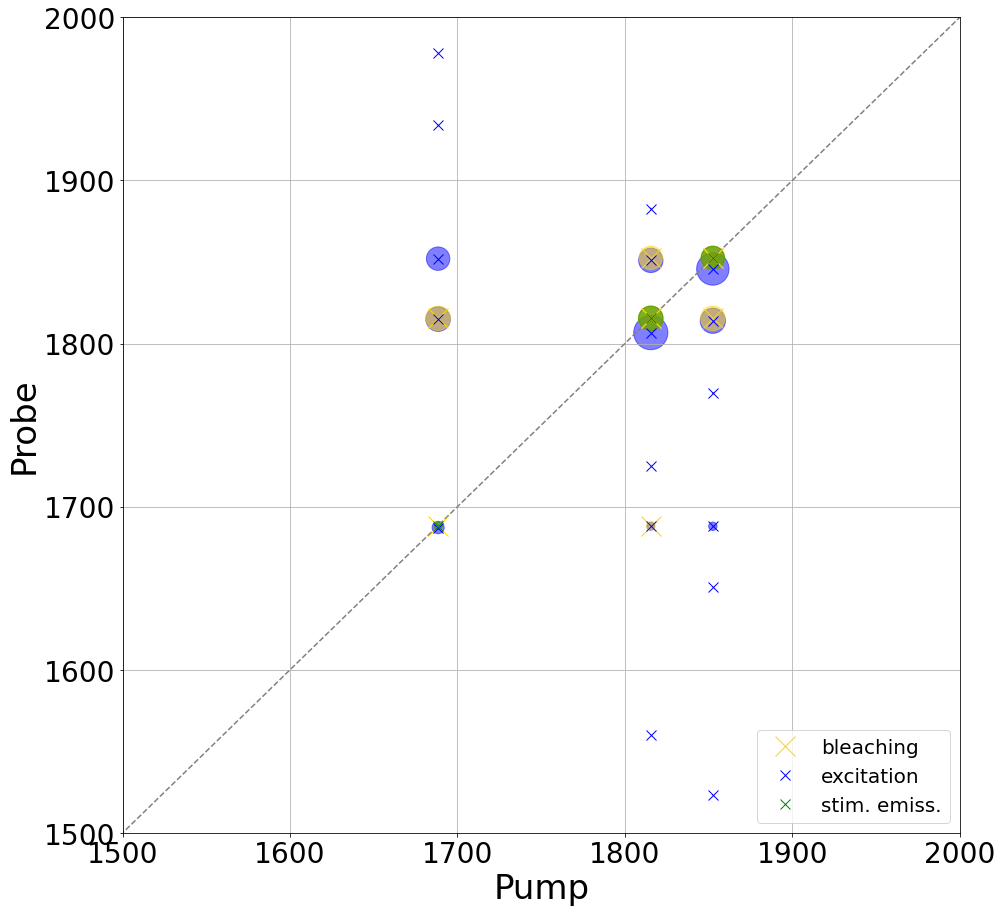

In [4]:
spec.plot_2dspectrum_dots(newmin,newmax,ble_x,ble_y,ble_i,exc_x,exc_y,exc_i,emi_x,emi_y,emi_i)
#plt.savefig('%s_anharm.png' %(mol),bbox_inches='tight')

### Plot 2D spectrum

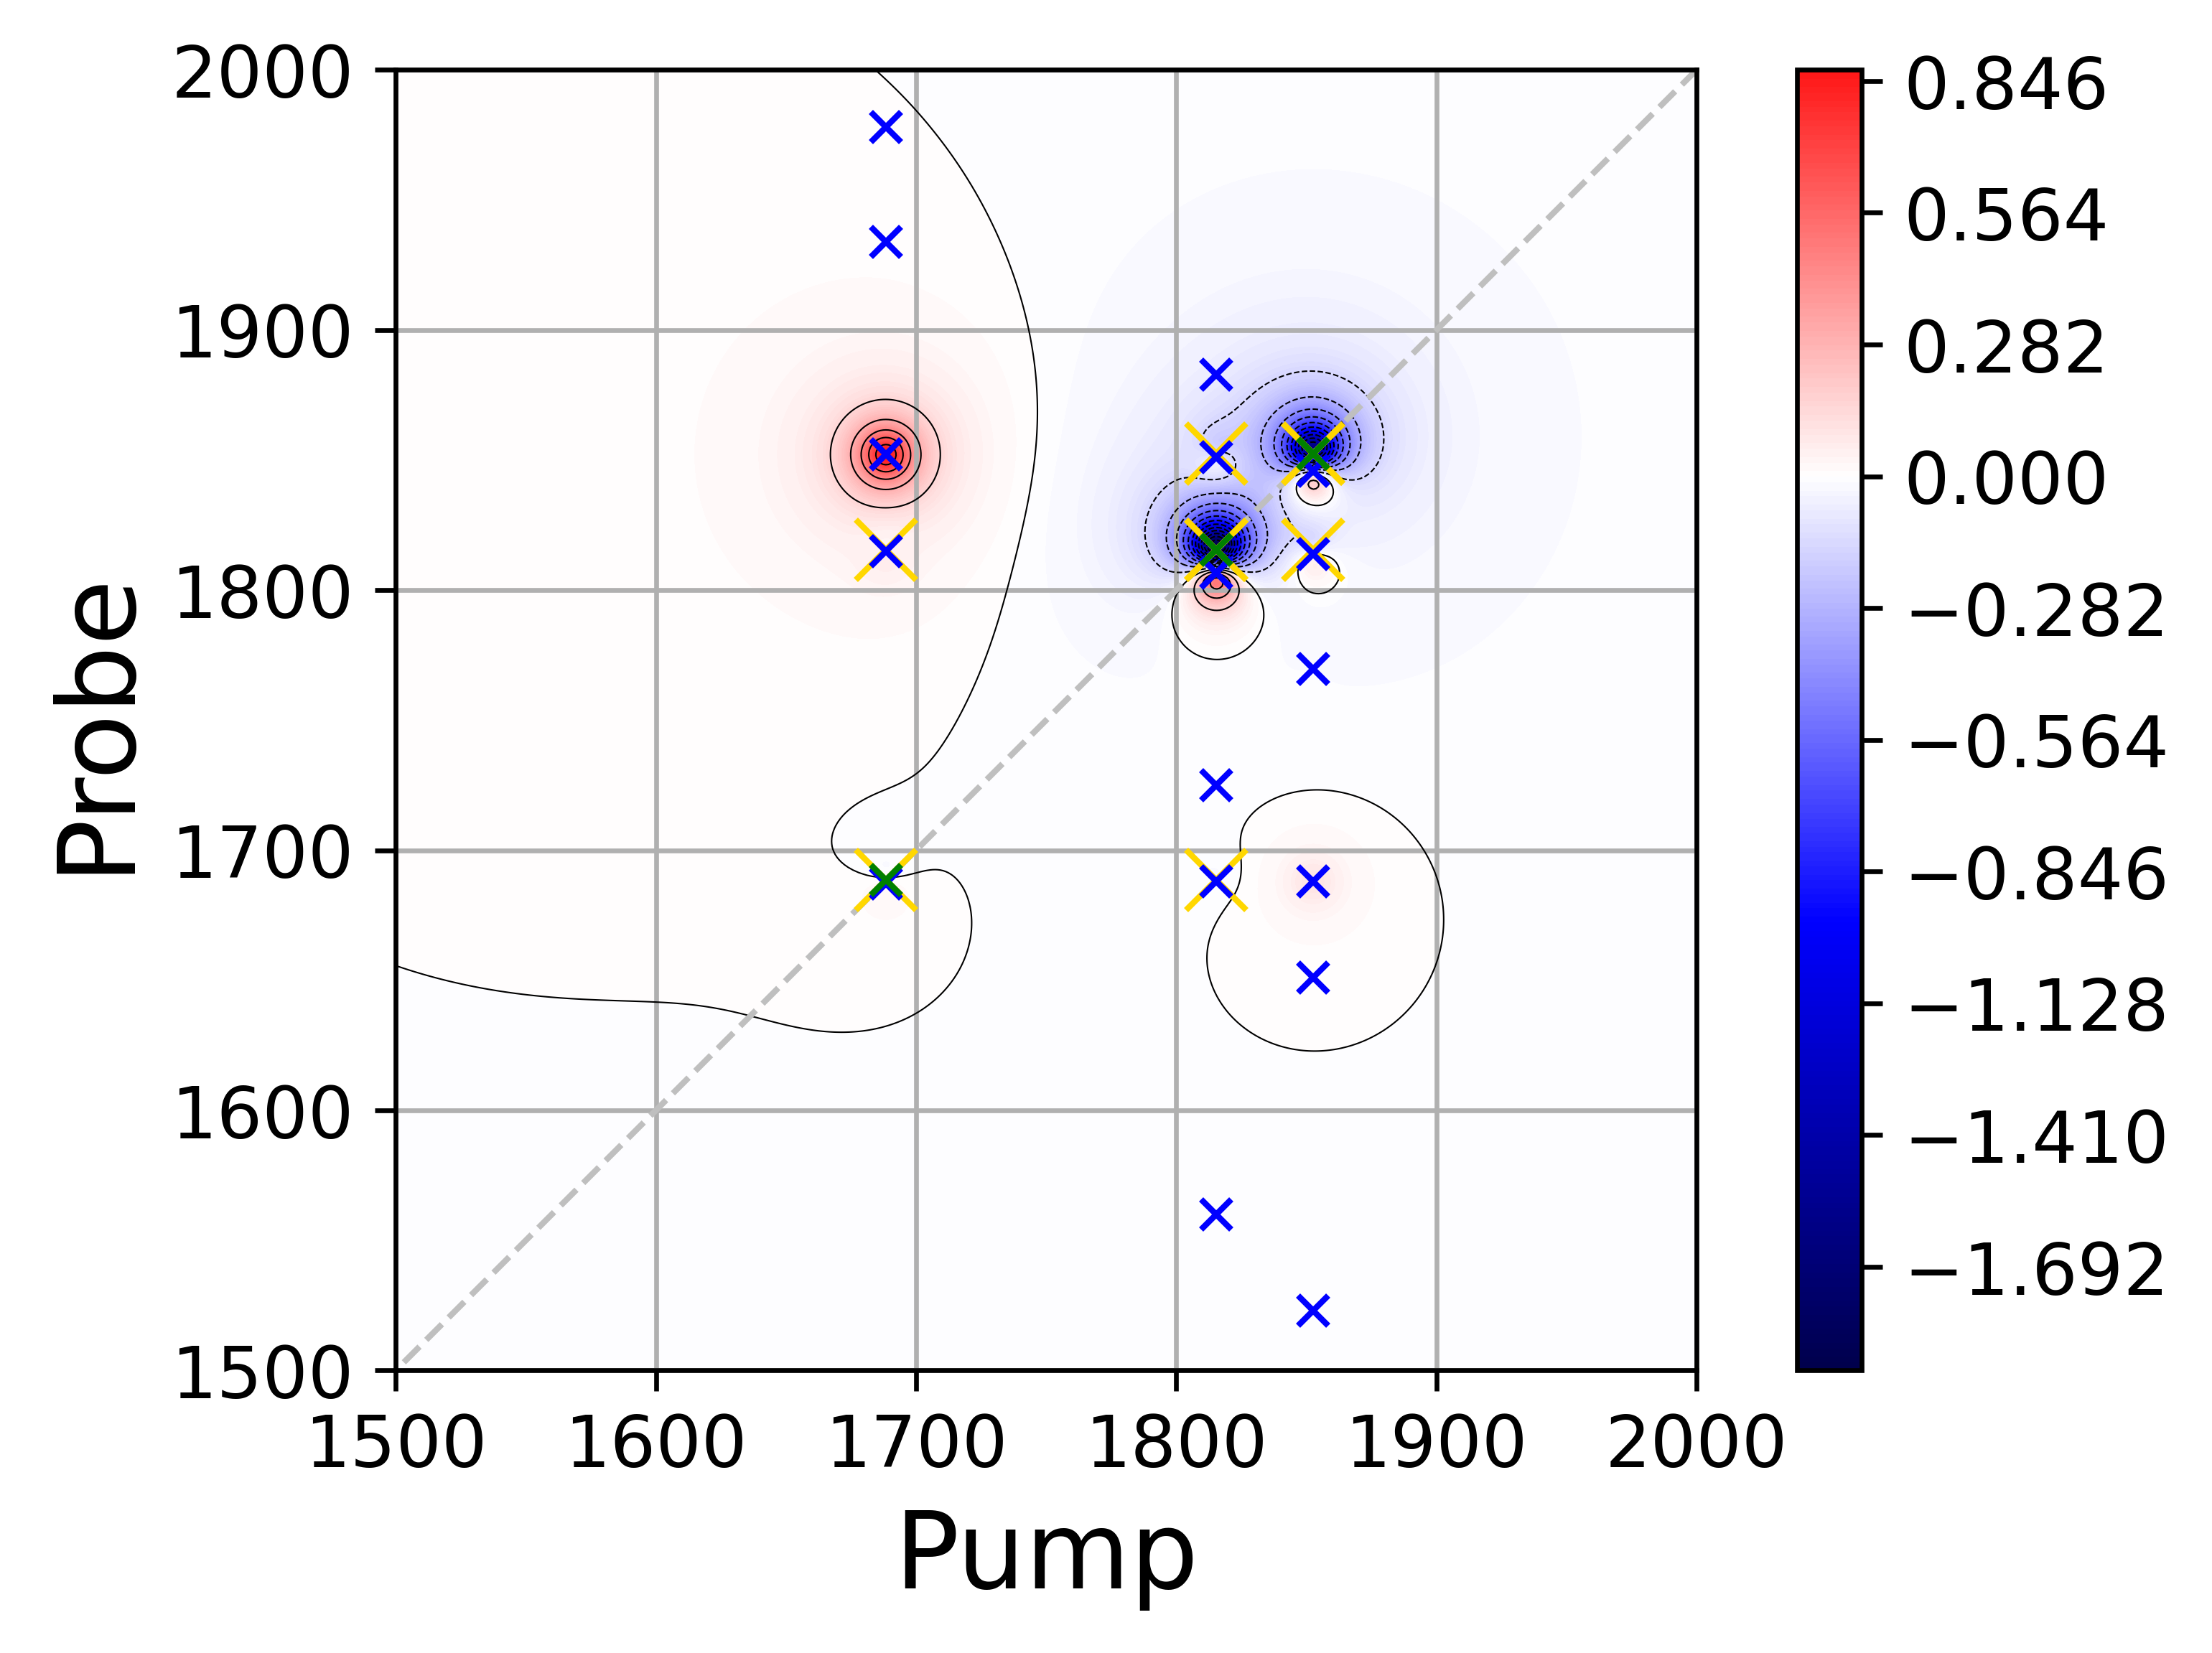

In [5]:
fig, ax = plt.subplots(dpi=600)
plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
CS = plt.contour(x,y,z,25,colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)

plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=10)
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=5)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=5)


#plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')